In [ ]:
import tensorflow as tf
import numpy as np

## Generating two classes of random points in a 2D plane

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5 ,1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5 ,1]],
    size=num_samples_per_class
)

### Stacking the two classes into an array with shape (2000, 2)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

### Generating the corresponding targets (0 and 1)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

### Plotting the two point classes

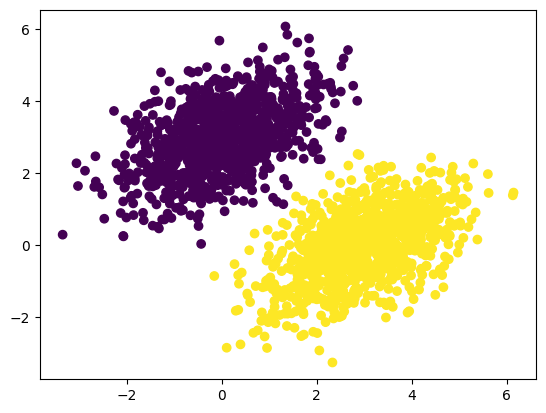

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### Creating the linear classifier variables

In [ ]:
input_dim = 2
output_dim = 1
w = tf.Variable(
    initial_value=tf.random.uniform(shape=(
        input_dim,output_dim
    )))
b = tf.Variable(
    initial_value=tf.zeros(shape=(
        output_dim,
    ))
    )

### The forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs, w) + b

### The mean squared error loss function

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

### The training step function

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

### The batch training loop

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.4539
Loss at step 1: 0.2890
Loss at step 2: 0.1384
Loss at step 3: 0.1141
Loss at step 4: 0.1047
Loss at step 5: 0.0976
Loss at step 6: 0.0912
Loss at step 7: 0.0855
Loss at step 8: 0.0802
Loss at step 9: 0.0754
Loss at step 10: 0.0711
Loss at step 11: 0.0671
Loss at step 12: 0.0634
Loss at step 13: 0.0601
Loss at step 14: 0.0571
Loss at step 15: 0.0543
Loss at step 16: 0.0517
Loss at step 17: 0.0494
Loss at step 18: 0.0473
Loss at step 19: 0.0454
Loss at step 20: 0.0436
Loss at step 21: 0.0420
Loss at step 22: 0.0406
Loss at step 23: 0.0392
Loss at step 24: 0.0380
Loss at step 25: 0.0369
Loss at step 26: 0.0359
Loss at step 27: 0.0350
Loss at step 28: 0.0341
Loss at step 29: 0.0333
Loss at step 30: 0.0326
Loss at step 31: 0.0320
Loss at step 32: 0.0314
Loss at step 33: 0.0309
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0288
Loss at step 39: 0.0285


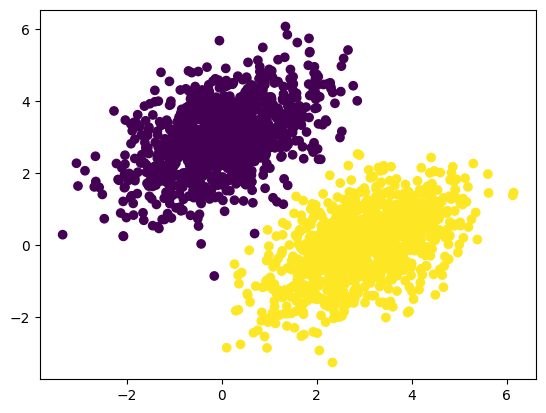

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# 3.6 Anatomy of a neural network: Understanding core Keras APIs

## 3.6.1 Layers: The building blocks of deep learning

In [ ]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)
